In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/cancer-data/Cancer_Data.csv')


In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt

# Получить количество диагнозов в датасете
gender_count = df['diagnosis'].value_counts()

# Создание пирога для визуализации распределения диагноза 
fig = px.pie(values=gender_count, names=gender_count.index)

# Добавляет заголовок
fig.update_layout(title="Распределение диагнозов в датасете")

# Визуализация в качестве диаграммы
fig2 = px.bar(y=gender_count, x=gender_count.index, color=gender_count.index)

# Инициализация отображения
fig.show()
fig2.show()

**Как видно из графиков доброкачественная опухоль преобладает над злокачественной почти два раза.**

**Предлогаю котигареальную колонку diagnosis преобразавать в числа. Для начало просто хочу превратить В и М в 0 и 1. Потом попробую дургой метод для сравнения результата**

In [5]:
# for n,d in enumerate(df['diagnosis']):
#     if d == 'B':
#         df['diagnosis'][n] = 0
#     else:
#         df['diagnosis'][n] = 1

# df.drop(columns=['Unnamed: 32', 'id'], axis = 1)

* Визуализируем данные для анализа

In [6]:
# import seaborn as sns
# sns.pairplot(df,hue='diagnosis',corner=True)

In [7]:
mapDiag = {'B': 0, 'M': 1}
df['diagnosis'] = df['diagnosis'].map(mapDiag)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from  sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
from xgboost import plot_importance

x = list(df.columns[2:32])
x = df[x]
y = df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=17, test_size=.3)


# scale = StandardScaler().fit(x_train)
# x_train = scale.transform(x_train)

# scale = StandardScaler().fit(x_test)
# x_test = scale.transform(x_test)


Перебераем все комбинации признаков и выделяем лучшие для логической регресии

In [9]:
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

rfecv = RFECV(estimator=LogisticRegression(class_weight = 'balanced', solver = 'lbfgs', random_state=42, n_jobs=-1, max_iter=50))
model = XGBClassifier(n_estimators=100)

# Мы используем Pipeline для преобразования данных. В Pipeline мы указываем rfeс для шага отбора признаков и модель, которая будет использоваться на следующем шаге. 
# 
RFCE использует метод исключения признаков и выводит лучшие признаки

# Затем мы задаем RepeatedStratifiedKFold с 10 сплитами и 5 повторениями. Многократная k-блочная кросс-валидация гарантирует, что количество сэмплов каждого класса будет сбалансированным в каждом блоке. RepeatedStratifiedKFold использует многократную k-блочную кросс-валидацию заданное количество раз с различной рандомизацией на каждом повторении. 

In [10]:
#Пайплайн осуществляет трансформирование данных, а уже после: масштабирование числовых переменных
pipeline = Pipeline([('Feature Selection', rfecv), ('Model', model)])
#Делаем крос валидацию(шафлим данные)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=47)
#Просим лучшие данные
n_scores = cross_val_score(pipeline, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
np.mean(n_scores)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.9476923076923076

# Приминяем Pipeline на тренеровочные данные.

In [11]:
pipeline.fit(x_train,y_train)
print("Optimal number of features : %d" % rfecv.n_features_)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Optimal number of features : 5


# Засуним это все в датафрей и отобразим в таблице

In [12]:
rfecv.support_
rfecv_df = pd.DataFrame(rfecv.ranking_,index=x.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfecv_df.head()

Rank
radius_mean         1
perimeter_se        1
texture_se          1
concavity_worst     1
radius_worst        1

# К выбранным признакам применяем линейную регресию

In [13]:
x = df[['radius_mean', 'perimeter_se', 'texture_se', 'concavity_worst', 'radius_worst',]]
y = df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=17, test_size=.3)

scale = StandardScaler().fit(x_train)
x_train = scale.transform(x_train)

scale = StandardScaler().fit(x_test)
x_test = scale.transform(x_test)

lr = LogisticRegression(class_weight = 'balanced', solver = 'lbfgs', random_state=42, n_jobs=-1, max_iter=100)
model = lr.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.9298245614035088

# Отобразим данные для дальнейшего метода kNN

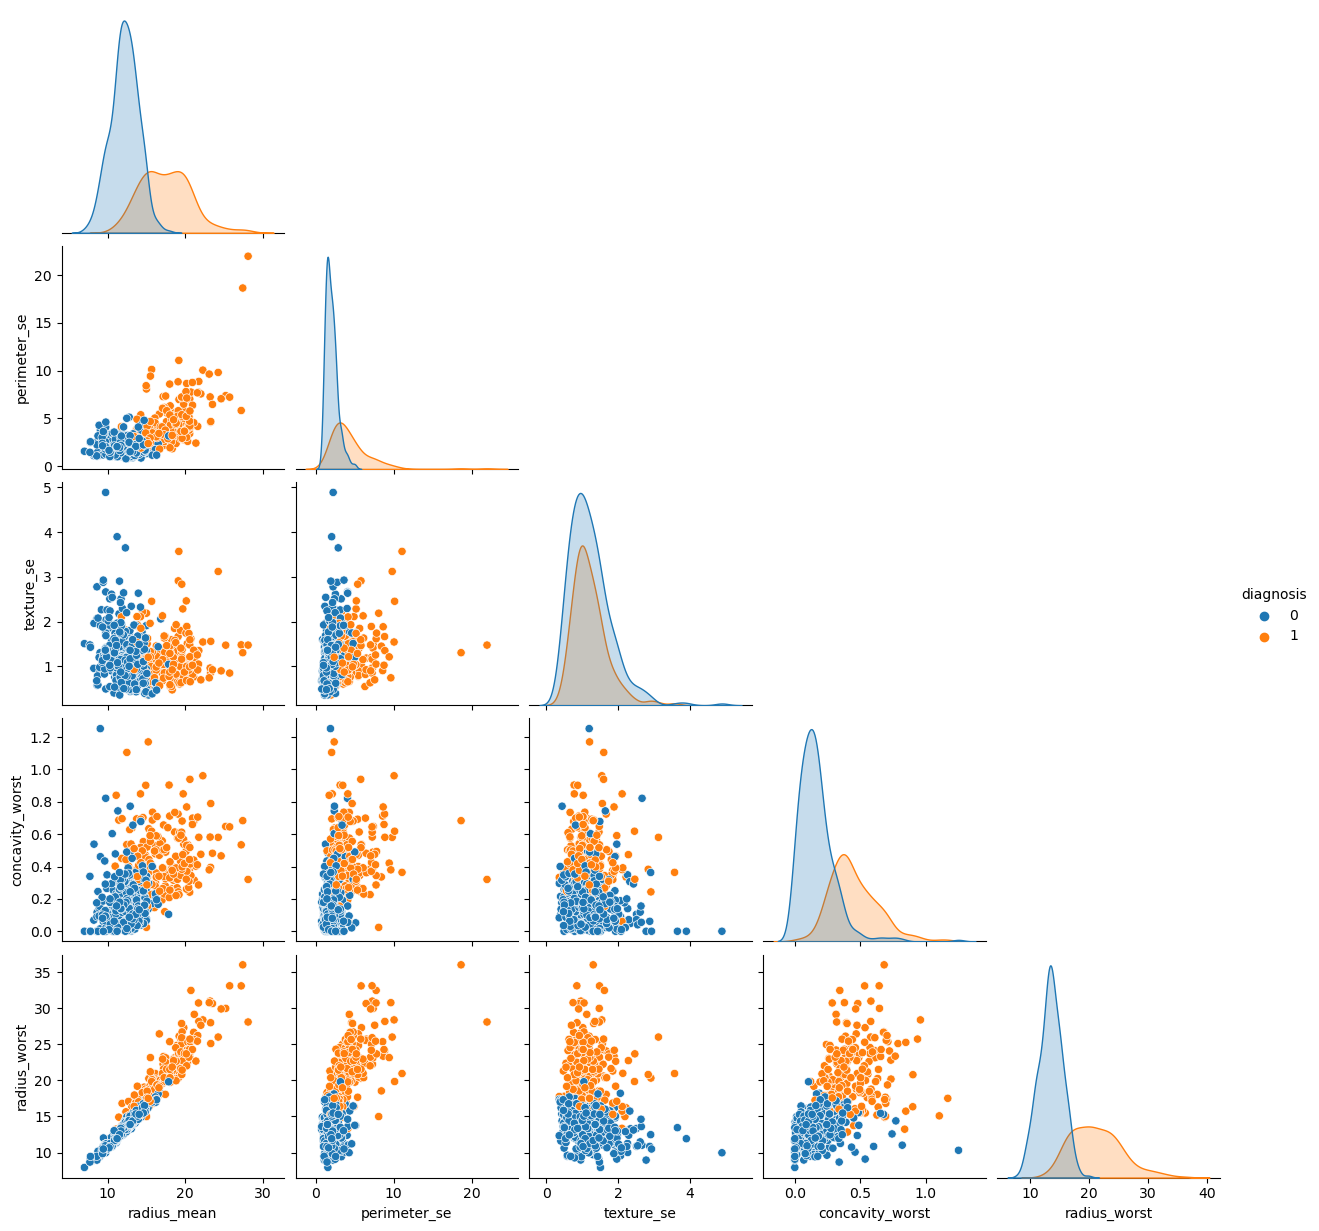

In [14]:
import seaborn as sns
sns.pairplot(df[['radius_mean', 'perimeter_se', 'texture_se', 'concavity_worst', 'radius_worst','diagnosis']],hue='diagnosis',corner=True)

# Подготавливаем данные

In [15]:
x = df[['radius_mean', 'perimeter_se']]
y = df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=17, test_size=.3)

scale = StandardScaler().fit(x_train)
x_train = scale.transform(x_train)

scale = StandardScaler().fit(x_test)
x_test = scale.transform(x_test)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix

knc = KNeighborsClassifier(n_neighbors=1)
knc_model = knc.fit(x_train, y_train)
knc_pred = knc.predict(x_test)

knc_accurance_pre = precision_score(knc_pred, y_test)
knc_accurance_recall = precision_score(knc_pred, y_test)
knc_maxtrix = confusion_matrix(y_test, knc_pred )

print(f'Accurance precision_score knc:{knc_accurance_pre}')
print(f'Accurance precision_score knc:{knc_accurance_recall}')
print(f'Matrix knc:{knc_maxtrix}')

Accurance precision_score knc:0.8524590163934426
Accurance precision_score knc:0.8524590163934426
Matrix knc:[[95 15]
 [ 9 52]]


# Далее попробуем классификацию библиотеки XGBoost

In [17]:
import xgboost as xgb

dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test, y_test)

params = {'objective': 'binary:logistic',
            'max_depth': 1,
            'eta': 0.1}

num_rounds = 60

In [18]:
xgb_model = xgb.train(params, dtrain, num_rounds)
predict = xgb_model.predict(dtest)
binary_matrix = np.array(predict)
binary_matrix[binary_matrix > .5] = 1
binary_matrix[binary_matrix <= .5] = 0


cm = confusion_matrix(y_test, binary_matrix)
ps = precision_score(y_test, binary_matrix)
rs = recall_score(y_test, binary_matrix)


In [19]:
print(cm)
print(ps)
print(rs)

[[108   2]
 [  9  52]]
0.9629629629629629
0.8524590163934426


# Нашел чувака которой сделал предикт на 100% путем SMOTE он балансирует классы, делая их равнзначиными.

In [20]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Instantiating SMOTE
smt = SMOTE(random_state = 0)

# Data Balancing
xtrain_res, ytrain_res = smt.fit_resample(x_train, y_train)

print(f'Distribution BEFORE balancing:\n{y_train.value_counts()}')
print('=-'*16)
print(f'Distribution AFTER balancing:\n{ytrain_res.value_counts()}')

Distribution BEFORE balancing:
0    247
1    151
Name: diagnosis, dtype: int64
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Distribution AFTER balancing:
1    247
0    247
Name: diagnosis, dtype: int64


In [21]:
rf = RandomForestClassifier(max_depth = 5, random_state = 0)
rf.fit(xtrain_res, ytrain_res)
pred = rf.predict(x_test)

In [22]:
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 0.9181286549707602
Precision: 0.8983050847457628
Recall: 0.8688524590163934


# Он убрал выбросы|в падлу все переделывать оставлю этот код тут просто. Мне кажеться мои 96% довольно не плохи.

In [23]:
# Threshold value to define the range for identifying outliers
threshold = 5

# Loop through all columns in the DataFrame, excluding the diagnosis
for column in df.loc[:, ~df.columns.isin(['diagnosis'])]:  
    
    # Mean and STD of the column
    mean = df[column].mean()
    std = df[column].std()

    # Lower and Upper limits
    lower_limit = mean - threshold * std
    upper_limit = mean + threshold * std

    # Remove outliers
    df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]